#  **Post** **Liver** **Transplantation** **Prediction** **Model**


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
-  we aim to develop a model that can accurately predict the post-transplantation outcomes for liver transplant patients. This prediction can assist healthcare providers in making informed decisions regarding patient care, treatment plans, and resource allocation, ultimately improving patient outcomes and optimizing healthcare operations.


### 2) Data Collection
- Dataset Source - Data provided by client.
- The data consists of 37 column and 1942 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [11]:
!pip install --upgrade scikit-learn
!pip install mysql-connector-python
#!pip install feature-engine
#!pip install scikit-learn imbalanced-learn
#!pip install --upgrade imbalanced-learn scikit-learn
#!pip uninstall scikit-learn imbalanced-learn

In [12]:
import pandas as pd                   # Data Manipulation
import numpy as np                    # Numeric Calculation
import seaborn as sns                 # Advance Data Visualization
import matplotlib.pyplot as plt       # Data Visualization
import scipy.stats as stats           # Normal Quantile-Quantile Plot
import pylab
import warnings                       # Warnings
warnings.filterwarnings('ignore')
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.metrics as skmet       # Confusion matrix
import mysql.connector as sql         # for SQL connection

In [18]:
df=pd.read_csv('/content/LiverT_dataset.csv')

#### Show Top 5 Records


In [19]:
df.head()

Column1  D Age D Gender  D BMI D Cause of Death  D Diabetes  \
0        0     40   Female   32.2           Stroke           1   
1        1     45   Female   32.1            Other           0   
2        2     21     Male   26.3         Accident           1   
3        3     41   Female   39.3            Other           1   
4        4     66   Female   38.4         Accident           1   

   D Hypertension  D Alcohol Abuse  D Smoking  D Lympochyte  ...  R Na  R Mg  \
0               1                1          0             0  ...   5.9   1.5   
1               0                0          0             1  ...   1.8   0.3   
2               1                0          1             1  ...  17.1   1.4   
3               1                1          0             1  ...  18.7   1.3   
4               1                1          0             0  ...   7.8   1.2   

   R WBC  R Platelets  R Cold Ischemia Time R Warm Ischemia Time  \
0  21310       426232                   3.9                  2.1   
1  19471       414357                   3.4                  3.0   
2   9204       292844                   7.2                  2.8   
3  24350       190143                  11.0                  2.5   
4  14871       403780                   2.7                  1.5   

   R Blood Transfusion  R Immunosuppressant Medication  R Rejection Episodes  \
0                  0.0                    Cyclosporine                     3   
1                  0.0                    Cyclosporine                     1   
2                  NaN                      Tacrolimus                     4   
3                  0.0                           Other                     0   
4                  1.0                           Other                     3   

              Complications  
0                 Infection  
1         Artery Thrombosis  
2  Post-transplant Diabetes  
3  Post-transplant Diabetes  
4         Renal Dysfunction  

[5 rows x 37 columns]

In [26]:
print(df['Complications'].unique())

['Infection' 'Artery Thrombosis' 'Post-transplant Diabetes'
 'Renal Dysfunction' 'No Complication' 'Primary Graft Non-function'
 'Portal Vein Thrombosis' 'Biliary Complications'
 'Metabolic Complications' 'Cardiovascular Complications' 'Rejection']


In [7]:
df.shape

(1942, 37)

### **2.2 Dataset information**

### **Donor :** The donor is the individual who voluntarily provides blood, an organ, or another biological material for the purpose of helping someone else.
### **Recipient :** The recipient is the person who receives the donated blood or an organ. This individual is usually in need of medical treatment or a life-saving intervention.
**D Age :** Donor Age -> age of Donor                                      
**D Gender :** Donor Gender -> (Male/female)         
**D BMI :** Donor Body Mass Index                                                 
**D Cause of Death :** Donor Cause of Death -> (Stroke/Other/Accident)    
**D Diabetes :** Donor Diabetes -> Donor has Diabetes or not                
**D Hypertension :** Donor Hypertension -> Donor has Hypertension or not      
**D Alcohol Abuse :** Donor Alcohol Abuse -> Alcohol abuse refers to the excessive and harmful consumption of alcoholic beverages that leads to negative physical, mental, social, or legal consequences                                    
**D Smoking :** Donor Smoking -> Donor do smoking or not            
**D Lympochyte :** Donor Lympochyte -> Donor lymphocytes are immune cells from a healthy donor that are used in medical procedures, like stem cell or bone marrow transplants, to help restore or enhance the recipient's immune system function.                                                
**D Hepatitis B :** Donor Hepatitis B -> Hepatitis B is a viral infection that primarily affects the liver and can cause a range of symptoms, from mild illness to chronic liver disease.               
**D Hepatitis C :** Donor Hepatitis C -> "Donor Hepatitis C" refers to the situation where a person who is an organ donor (typically of organs like the liver or kidneys) is infected with the Hepatitis C virus (HCV)            
**R Etiology :** Recipient Etiology -> The underlying cause or origin of a condition or disease in the recipient or patient -> (Other/Alcohol/Hepatitis/NAFLD)                   
**R MELD Score :** Recipient MELD Score -> The Recipient MELD (Model for End-Stage Liver Disease) Score is a numerical scale used in the field of liver transplantation to assess the severity of liver disease in a potential transplant recipient.                
**R Age :** Recipient Age -> age of Recipient Recipient                        
**R Gender :** Recipient Gender -> (Male/female)                    
**R BMI :** Recipient BMI -> Recipient Body Mass Index                        
**R Diabetes :** Recipient Diabetes -> Recipient has Diabetes or not                  
**R Hypertension :** Recipient Hypertension -> Recipient has Hypertension or not              
**R Alcohol Abuse :** Recipient Alcohol Abuse -> Alcohol abuse refers to the excessive and harmful consumption of alcoholic beverages that leads to negative physical, mental, social, or legal consequences     
**R Smoking :** Recipient Smoking -> Recipient do smoking or not              
**R Lympochyte :** Recipient Lympochyte -> Lymphocytes are a type of white blood cell that plays a crucial role in the immune system , "Recipient Lymphocyte" could refer to lymphocytes from the recipient of a transplant such as an organ or bone marrow transplant.       
**R Hepatitis B :** Recipient Hepatitis B -> Hepatitis B is a viral infection that primarily affects the liver and can cause a range of symptoms, from mild illness to chronic liver disease.                
**R Hepatitis C :** Recipient Hepatitis C -> Hepatitis C is a viral infection that primarily affects the liver and can lead to chronic liver disease, cirrhosis, and other complications                
**R Albumin level :** Recipient Albumin level -> It typically refers to the concentration of albumin, a protein found in blood plasma, within the recipient's (patient's) bloodstream.               
**R Alcoholic cirrhosis :** Recipient Alcoholic cirrhosis -> It refers to the severity or stage of alcoholic cirrhosis in a person who is receiving medical care or treatment.        
**R Primary biliary cirrhosis :** Recipient Primary biliary cirrhosis -> It refers to a medical condition where a person who is receiving an organ transplant, such as a liver transplant, has primary biliary cirrhosis (PBC)  
**R Na :** Recipient -> It is used in a medical or scientific context to indicate the entity that is receiving a sodium-related treatment, supplement, or intervention                          
**R Mg :** Recipient -> The amount or dosage of magnesium (Mg) that is being administered or given to a recipient                          
**R WBC :** Recipient white Blood Cells count                         
**R Platelets :** Recipient Platelets -> It refers to platelet transfusions given to a person (recipient) who has a medical condition or situation that requires an increase in their platelet count                 
**R Cold Ischemia Time :** Recipient Cold Ischemia Time -> The duration for which an organ intended for transplantation is cooled and preserved after being removed from the donor's body and before being transplanted into the recipient's body.       
**R Warm Ischemia Time :** Recipient Warm Ischemia Time -> The duration of time during which an organ intended for transplantation is without a consistent blood supply and oxygen while it is outside the donor's body and before it is successfully transplanted into the recipient's body        
**R Blood Transfusion :** Recipient Blood Transfusion -> The process of giving blood to a person (the recipient) who requires a blood transfusion         
**R Immunosuppressant Medication :** Recipient Immunosuppressant Medication -> It refers to drugs that are administered to individuals who have undergone organ transplantation (Cyclosporine/Tacrolimus/Other)
**R Rejection Episodes :** Recipient Rejection Episodes -> It refers to instances in the context of organ transplantation, where the recipient's immune system recognizes the transplanted organ as foreign and mounts an immune response against it       
**Complications :** Recipient Complications -> It refers to the negative or adverse outcomes that can occur in a person who has received a medical treatment, procedure, organ transplant, or other form of intervention (Infection/Artery Thrombosis/Post-transplant Diabetes/Renal Dysfunction/No Complication/Primary Graft Non-function/Portal Vein Thrombosis/Biliary Complications/Metabolic Complications/Cardiovascular Complications/Rejection)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

Column1                           0
D Age                             0
D Gender                          0
D BMI                             0
D Cause of Death                  0
D Diabetes                        0
D Hypertension                    0
D Alcohol Abuse                   0
D Smoking                         0
D Lympochyte                      0
D Hepatitis B                     1
D Hepatitis C                     0
R Etiology                        1
R MELD Score                      0
R Age                             0
R Gender                          1
R BMI                             1
R Diabetes                        0
R Hypertension                    0
R Alcohol Abuse                   0
R Smoking                         0
R Lympochyte                      1
R Hepatitis B                     0
R Hepatitis C                     0
R Albumin level                   0
R Alcoholic cirrhosis             0
R Primary biliary cirrhosis       0
R Na                        

#### There are missing values in the data set

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

4

### 3.3 Check data types

In [23]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1942 non-null   float64
 1   D Age                           1942 non-null   float64
 2   D Gender                        1942 non-null   object 
 3   D BMI                           1942 non-null   float64
 4   D Cause of Death                1942 non-null   object 
 5   D Diabetes                      1942 non-null   float64
 6   D Hypertension                  1942 non-null   float64
 7   D Alcohol Abuse                 1942 non-null   float64
 8   D Smoking                       1942 non-null   float64
 9   D Lympochyte                    1942 non-null   float64
 10  D Hepatitis B                   1942 non-null   float64
 11  D Hepatitis C                   1942 non-null   float64
 12  R Etiology                      19

### 3.4 Checking the number of unique values of each column

In [24]:
df.nunique()

Column1                           1938
D Age                               53
D Gender                             2
D BMI                              221
D Cause of Death                     3
D Diabetes                           2
D Hypertension                       2
D Alcohol Abuse                      2
D Smoking                            2
D Lympochyte                         2
D Hepatitis B                        2
D Hepatitis C                        2
R Etiology                           4
R MELD Score                        19
R Age                               53
R Gender                             2
R BMI                              201
R Diabetes                           2
R Hypertension                       2
R Alcohol Abuse                      2
R Smoking                            2
R Lympochyte                         2
R Hepatitis B                        2
R Hepatitis C                        2
R Albumin level                     21
R Alcoholic cirrhosis    

### 3.5 Check statistics of data set

In [25]:
df.describe()

Column1        D Age        D BMI   D Diabetes  D Hypertension  \
count  1942.000000  1942.000000  1942.000000  1942.000000     1942.000000   
mean    967.600412    44.181771    29.077240     0.736354        0.792482   
std     560.580638    15.088112     6.349143     0.440723        0.405634   
min       0.000000    18.000000    18.000000     0.000000        0.000000   
25%     482.250000    31.000000    23.700000     0.000000        1.000000   
50%     967.500000    44.000000    29.000000     1.000000        1.000000   
75%    1452.750000    57.000000    34.800000     1.000000        1.000000   
max    1937.000000    70.000000    40.000000     1.000000        1.000000   

       D Alcohol Abuse    D Smoking  D Lympochyte  D Hepatitis B  \
count      1942.000000  1942.000000   1942.000000    1942.000000   
mean          0.465499     0.233780      0.610711       0.492791   
std           0.498937     0.423343      0.487715       0.500077   
min           0.000000     0.000000      0.000000       0.000000   
25%           0.000000     0.000000      0.000000       0.000000   
50%           0.000000     0.000000      1.000000       0.000000   
75%           1.000000     0.000000      1.000000       1.000000   
max           1.000000     1.000000      1.000000       1.000000   

       D Hepatitis C  ...  R Alcoholic cirrhosis  R Primary biliary cirrhosis  \
count    1942.000000  ...            1942.000000                  1942.000000   
mean        0.409887  ...              48.104016                     9.193512   
std         0.491939  ...              28.426256                     7.574906   
min         0.000000  ...               0.000000                     0.100000   
25%         0.000000  ...              24.000000                     3.000000   
50%         0.000000  ...              47.000000                     7.150000   
75%         1.000000  ...              72.000000                    13.400000   
max         1.000000  ...             100.000000                    25.000000   

              R Na         R Mg         R WBC    R Platelets  \
count  1942.000000  1942.000000   1942.000000    1942.000000   
mean      9.912770     0.988671  14067.858908  302047.562307   
std       9.513351     0.907809   6384.729938   86092.055847   
min       0.100000     0.000000   3005.000000  150189.000000   
25%       2.900000     0.300000   8684.250000  224463.250000   
50%       6.900000     0.700000  14061.000000  303644.000000   
75%      14.200000     1.400000  19688.000000  375117.000000   
max      50.000000     3.500000  24983.000000  449992.000000   

       R Cold Ischemia Time  R Warm Ischemia Time  R Blood Transfusion  \
count           1942.000000           1942.000000          1942.000000   
mean               6.910041              2.987127             0.491761   
std                2.838200              1.164749             0.500061   
min                2.000000              1.000000             0.000000   
25%                4.400000              1.900000             0.000000   
50%                6.850000              3.000000             0.000000   
75%                9.400000              4.000000             1.000000   
max               12.000000              5.000000             1.000000   

       R Rejection Episodes  
count           1942.000000  
mean               2.503605  
std                1.706652  
min                0.000000  
25%                1.000000  
50%                3.000000  
75%                4.000000  
max                5.000000  

[8 rows x 31 columns]

### 3.7 Exploring Data

In [26]:
df.head()

Column1  D Age D Gender  D BMI D Cause of Death  D Diabetes  \
0      0.0   40.0   Female   32.2           Stroke         1.0   
1      1.0   45.0   Female   32.1            Other         0.0   
2      2.0   21.0     Male   26.3         Accident         1.0   
3      3.0   41.0   Female   39.3            Other         1.0   
4      4.0   66.0   Female   38.4         Accident         1.0   

   D Hypertension  D Alcohol Abuse  D Smoking  D Lympochyte  ...  R Na  R Mg  \
0             1.0              1.0        0.0           0.0  ...   5.9   1.5   
1             0.0              0.0        0.0           1.0  ...   1.8   0.3   
2             1.0              0.0        1.0           1.0  ...  17.1   1.4   
3             1.0              1.0        0.0           1.0  ...  18.7   1.3   
4             1.0              1.0        0.0           0.0  ...   7.8   1.2   

     R WBC  R Platelets  R Cold Ischemia Time R Warm Ischemia Time  \
0  21310.0     426232.0                   3.9                  2.1   
1  19471.0     414357.0                   3.4                  3.0   
2   9204.0     292844.0                   7.2                  2.8   
3  24350.0     190143.0                  11.0                  2.5   
4  14871.0     403780.0                   2.7                  1.5   

   R Blood Transfusion  R Immunosuppressant Medication  R Rejection Episodes  \
0                  0.0                    Cyclosporine                   3.0   
1                  0.0                    Cyclosporine                   1.0   
2                  0.0                      Tacrolimus                   4.0   
3                  0.0                           Other                   0.0   
4                  1.0                           Other                   3.0   

              Complications  
0                 Infection  
1         Artery Thrombosis  
2  Post-transplant Diabetes  
3  Post-transplant Diabetes  
4         Renal Dysfunction  

[5 rows x 37 columns]

In [19]:
print("Categories in 'D Gender' variable:     ",end=" " )
print(df['D Gender'].unique())

print("Categories in 'D Cause of Death' variable:  ",end=" ")
print(df['D Cause of Death'].unique())

print("Categories in 'R Etiology' variable:",end=" " )
print(df['R Etiology'].unique())

print("Categories in 'R Gender' variable:     ",end=" " )
print(df['R Gender'].unique())

print("Categories in 'R Immunosuppressant Medication' variable:     ",end=" " )
print(df['R Immunosuppressant Medication'].unique())

print("Categories in 'Complications' variable:     ",end=" " )
print(df['Complications'].unique())

Categories in 'D Gender' variable:      ['Female' 'Male']
Categories in 'D Cause of Death' variable:   ['Stroke' 'Other' 'Accident']
Categories in 'R Etiology' variable: ['Other' 'Alcohol' 'Hepatitis' 'NAFLD']
Categories in 'R Gender' variable:      ['Female' 'Male']
Categories in 'R Immunosuppressant Medication' variable:      ['Cyclosporine' 'Tacrolimus' 'Other']
Categories in 'Complications' variable:      ['Infection' 'Artery Thrombosis' 'Post-transplant Diabetes'
 'Renal Dysfunction' 'No Complication' 'Primary Graft Non-function'
 'Portal Vein Thrombosis' 'Biliary Complications'
 'Metabolic Complications' 'Cardiovascular Complications' 'Rejection']


In [28]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 31 numerical features : ['Column1', 'D Age', 'D BMI', 'D Diabetes', 'D Hypertension', 'D Alcohol Abuse', 'D Smoking', 'D Lympochyte', 'D Hepatitis B', 'D Hepatitis C', 'R MELD Score', 'R Age', 'R BMI', 'R Diabetes', 'R Hypertension', 'R Alcohol Abuse', 'R Smoking', 'R Lympochyte', 'R Hepatitis B', 'R Hepatitis C', 'R Albumin level', 'R Alcoholic cirrhosis', 'R Primary biliary cirrhosis', 'R Na', 'R Mg', 'R WBC', 'R Platelets', 'R Cold Ischemia Time', 'R Warm Ischemia Time', 'R Blood Transfusion', 'R Rejection Episodes']

We have 6 categorical features : ['D Gender', 'D Cause of Death', 'R Etiology', 'R Gender', 'R Immunosuppressant Medication', 'Complications']


In [29]:
df.head(5)

Column1  D Age D Gender  D BMI D Cause of Death  D Diabetes  \
0      0.0   40.0   Female   32.2           Stroke         1.0   
1      1.0   45.0   Female   32.1            Other         0.0   
2      2.0   21.0     Male   26.3         Accident         1.0   
3      3.0   41.0   Female   39.3            Other         1.0   
4      4.0   66.0   Female   38.4         Accident         1.0   

   D Hypertension  D Alcohol Abuse  D Smoking  D Lympochyte  ...  R Na  R Mg  \
0             1.0              1.0        0.0           0.0  ...   5.9   1.5   
1             0.0              0.0        0.0           1.0  ...   1.8   0.3   
2             1.0              0.0        1.0           1.0  ...  17.1   1.4   
3             1.0              1.0        0.0           1.0  ...  18.7   1.3   
4             1.0              1.0        0.0           0.0  ...   7.8   1.2   

     R WBC  R Platelets  R Cold Ischemia Time R Warm Ischemia Time  \
0  21310.0     426232.0                   3.9                  2.1   
1  19471.0     414357.0                   3.4                  3.0   
2   9204.0     292844.0                   7.2                  2.8   
3  24350.0     190143.0                  11.0                  2.5   
4  14871.0     403780.0                   2.7                  1.5   

   R Blood Transfusion  R Immunosuppressant Medication  R Rejection Episodes  \
0                  0.0                    Cyclosporine                   3.0   
1                  0.0                    Cyclosporine                   1.0   
2                  0.0                      Tacrolimus                   4.0   
3                  0.0                           Other                   0.0   
4                  1.0                           Other                   3.0   

              Complications  
0                 Infection  
1         Artery Thrombosis  
2  Post-transplant Diabetes  
3  Post-transplant Diabetes  
4         Renal Dysfunction  

[5 rows x 37 columns]

### 4. Exploring Data ( Visualization )


#### 4.1 First Moment Business Decision
Measure of Central Tendency

In [31]:
df.mean()

Column1                           967.600412
D Age                              44.181771
D BMI                              29.077240
D Diabetes                          0.736354
D Hypertension                      0.792482
D Alcohol Abuse                     0.465499
D Smoking                           0.233780
D Lympochyte                        0.610711
D Hepatitis B                       0.492791
D Hepatitis C                       0.409887
R MELD Score                       20.674047
R Age                              44.799691
R BMI                              24.873481
R Diabetes                          0.681256
R Hypertension                      0.123584
R Alcohol Abuse                     0.285788
R Smoking                           0.147786
R Lympochyte                        0.399073
R Hepatitis B                       0.195160
R Hepatitis C                       0.316169
R Albumin level                    40.280639
R Alcoholic cirrhosis              48.104016
R Primary 

In [32]:
df.median()

Column1                           967.50
D Age                              44.00
D BMI                              29.00
D Diabetes                          1.00
D Hypertension                      1.00
D Alcohol Abuse                     0.00
D Smoking                           0.00
D Lympochyte                        1.00
D Hepatitis B                       0.00
D Hepatitis C                       0.00
R MELD Score                       20.00
R Age                              45.00
R BMI                              25.00
R Diabetes                          1.00
R Hypertension                      0.00
R Alcohol Abuse                     0.00
R Smoking                           0.00
R Lympochyte                        0.00
R Hepatitis B                       0.00
R Hepatitis C                       0.00
R Albumin level                    40.00
R Alcoholic cirrhosis              47.00
R Primary biliary cirrhosis         7.15
R Na                                6.90
R Mg            

In [33]:
df.mode()

Column1  D Age D Gender  D BMI D Cause of Death  D Diabetes  \
0      19.0   48.0   Female   28.6            Other         1.0   
1      34.0    NaN      NaN    NaN              NaN         NaN   
2     140.0    NaN      NaN    NaN              NaN         NaN   
3    1934.0    NaN      NaN    NaN              NaN         NaN   
4       NaN    NaN      NaN    NaN              NaN         NaN   
5       NaN    NaN      NaN    NaN              NaN         NaN   
6       NaN    NaN      NaN    NaN              NaN         NaN   
7       NaN    NaN      NaN    NaN              NaN         NaN   
8       NaN    NaN      NaN    NaN              NaN         NaN   
9       NaN    NaN      NaN    NaN              NaN         NaN   
10      NaN    NaN      NaN    NaN              NaN         NaN   

    D Hypertension  D Alcohol Abuse  D Smoking  D Lympochyte  ...  R Na  R Mg  \
0              1.0              0.0        0.0           1.0  ...   0.1   0.1   
1              NaN              NaN        NaN           NaN  ...   1.4   NaN   
2              NaN              NaN        NaN           NaN  ...   NaN   NaN   
3              NaN              NaN        NaN           NaN  ...   NaN   NaN   
4              NaN              NaN        NaN           NaN  ...   NaN   NaN   
5              NaN              NaN        NaN           NaN  ...   NaN   NaN   
6              NaN              NaN        NaN           NaN  ...   NaN   NaN   
7              NaN              NaN        NaN           NaN  ...   NaN   NaN   
8              NaN              NaN        NaN           NaN  ...   NaN   NaN   
9              NaN              NaN        NaN           NaN  ...   NaN   NaN   
10             NaN              NaN        NaN           NaN  ...   NaN   NaN   

      R WBC  R Platelets  R Cold Ischemia Time R Warm Ischemia Time  \
0    8639.0     179246.0                   6.8                  1.9   
1   19802.0     191609.0                   NaN                  NaN   
2   21377.0     196009.0                   NaN                  NaN   
3   21743.0     206936.0                   NaN                  NaN   
4       NaN     249804.0                   NaN                  NaN   
5       NaN     259229.0                   NaN                  NaN   
6       NaN     322642.0                   NaN                  NaN   
7       NaN     354236.0                   NaN                  NaN   
8       NaN     369684.0                   NaN                  NaN   
9       NaN     377094.0                   NaN                  NaN   
10      NaN     384154.0                   NaN                  NaN   

    R Blood Transfusion  R Immunosuppressant Medication  R Rejection Episodes  \
0                   0.0                           Other                   4.0   
1                   NaN                             NaN                   NaN   
2                   NaN                             NaN                   NaN   
3                   NaN                             NaN                   NaN   
4                   NaN                             NaN                   NaN   
5                   NaN                             NaN                   NaN   
6                   NaN                             NaN                   NaN   
7                   NaN                             NaN                   NaN   
8                   NaN                             NaN                   NaN   
9                   NaN                             NaN                   NaN   
10                  NaN                             NaN                   NaN   

      Complications  
0   No Complication  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN  
10              NaN  

[11 rows x 37 columns]

#### 4.2 Second Moment Business Decision
Measure of Dispersion

In [34]:
df.var()

Column1                        3.142507e+05
D Age                          2.276511e+02
D BMI                          4.031162e+01
D Diabetes                     1.942367e-01
D Hypertension                 1.645390e-01
D Alcohol Abuse                2.489379e-01
D Smoking                      1.792190e-01
D Lympochyte                   2.378656e-01
D Hepatitis B                  2.500768e-01
D Hepatitis C                  2.420042e-01
R MELD Score                   2.976645e+01
R Age                          2.259985e+02
R BMI                          2.320162e+01
R Diabetes                     2.172580e-01
R Hypertension                 1.083667e-01
R Alcohol Abuse                2.042183e-01
R Smoking                      1.260100e-01
R Lympochyte                   2.399373e-01
R Hepatitis B                  1.571533e-01
R Hepatitis C                  2.163175e-01
R Albumin level                3.716128e+01
R Alcoholic cirrhosis          8.080520e+02
R Primary biliary cirrhosis    5

In [35]:
df.std()

Column1                          560.580638
D Age                             15.088112
D BMI                              6.349143
D Diabetes                         0.440723
D Hypertension                     0.405634
D Alcohol Abuse                    0.498937
D Smoking                          0.423343
D Lympochyte                       0.487715
D Hepatitis B                      0.500077
D Hepatitis C                      0.491939
R MELD Score                       5.455863
R Age                             15.033246
R BMI                              4.816806
R Diabetes                         0.466109
R Hypertension                     0.329191
R Alcohol Abuse                    0.451905
R Smoking                          0.354979
R Lympochyte                       0.489834
R Hepatitis B                      0.396426
R Hepatitis C                      0.465099
R Albumin level                    6.096006
R Alcoholic cirrhosis             28.426256
R Primary biliary cirrhosis     

#### 4.3 Third Moment Business Decision
Skewness

In [36]:
df.skew()

Column1                        0.000894
D Age                         -0.042691
D BMI                         -0.010029
D Diabetes                    -1.073681
D Hypertension                -1.443584
D Alcohol Abuse                0.138439
D Smoking                      1.259003
D Lympochyte                  -0.454465
D Hepatitis B                  0.028862
D Hepatitis C                  0.366737
R MELD Score                   0.077396
R Age                         -0.066084
R BMI                         -0.003809
R Diabetes                    -0.778544
R Hypertension                 2.289273
R Alcohol Abuse                0.949018
R Smoking                      1.986469
R Lympochyte                   0.412511
R Hepatitis B                  1.539530
R Hepatitis C                  0.791317
R Albumin level               -0.031042
R Alcoholic cirrhosis          0.073373
R Primary biliary cirrhosis    0.832740
R Na                           1.638240
R Mg                           1.186530


#### 4.4 Fourth Moment Business Decision
Kurtosis

In [37]:
df.kurt()

Column1                       -1.201083
D Age                         -1.173611
D BMI                         -1.204316
D Diabetes                    -0.848083
D Hypertension                 0.084021
D Alcohol Abuse               -1.982878
D Smoking                     -0.415340
D Lympochyte                  -1.795311
D Hepatitis B                 -2.001229
D Hepatitis C                 -1.867428
R MELD Score                  -1.180970
R Age                         -1.151490
R BMI                         -0.524767
R Diabetes                    -1.395308
R Hypertension                 3.244112
R Alcohol Abuse               -1.100500
R Smoking                      1.948064
R Lympochyte                  -1.831722
R Hepatitis B                  0.370534
R Hepatitis C                 -1.375234
R Albumin level               -1.194211
R Alcoholic cirrhosis         -1.112879
R Primary biliary cirrhosis   -0.421478
R Na                           3.128179
R Mg                           0.677945


## 5. Graphical Representation
### 5.1 Univariate Analysis
### 5.1.1 Histogram and Barplot

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col], bins=20, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title("Histogram of : " + col)
        plt.show()
    elif df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title("Bar Plot of : " + col)
        plt.xticks(rotation=45)
        plt.show()

### 5.1.2 Distplot and Countplot

In [ ]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        sns.distplot(df[col])
        plt.title(col)
        plt.show()
    else:
        if df[col].nunique():
            sns.countplot(data=df, x=col)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show()

### 5.1.3 Boxplot

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    if np.issubdtype(df[col].dtype, np.number):
        sns.boxplot(data=df, y=col)
    else:
        sns.boxplot(data=df, x=col, y='D Age')  # Replace 'D Age' with a numeric column
    plt.title(f"Boxplot of : {col}")
    plt.xticks(rotation=45)
    plt.show()

### 5.1.4 Count Plot

In [ ]:
for col in df.columns:
    if df[col].nunique() :
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Count Plot of : {col}")
        plt.xticks(rotation=45)
        plt.show()

### 5.1.5 Normal Q-Q plot

In [ ]:
# Checking Whether data is normally distributed

for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype in ['int64', 'float64']:
        stats.probplot(df[col], dist="norm", plot=pylab)
        plt.title(f"Normal Q-Q Plot of : {col}")
        plt.show()

In [44]:
# Print Q-Q plot statistics for all columns
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        qq_plot_stats = stats.probplot(df[col], dist="norm", plot=None)
        observed_values = qq_plot_stats[0]  # This contains the sorted observed values
        print(f"{col} :")
        print("Observed values:", observed_values)
        print()

Column1 :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
        3.13263894,  3.38425324]), array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.935e+03, 1.936e+03,
       1.937e+03]))

D Age :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
        3.13263894,  3.38425324]), array([18., 18., 18., ..., 70., 70., 70.]))

D BMI :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
        3.13263894,  3.38425324]), array([18., 18., 18., ..., 40., 40., 40.]))

D Diabetes :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
        3.13263894,  3.38425324]), array([0., 0., 0., ..., 1., 1., 1.]))

D Hypertension :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
        3.13263894,  3.38425324]), array([0., 0., 0., ..., 1., 1., 1.]))

D Alcohol Abuse :
Observed values: (array([-3.38425324, -3.13263894, -2.99304428, ...,  2.99304428,
   

### 5.1.6 Pie chart

<Axes: ylabel='Complications'>

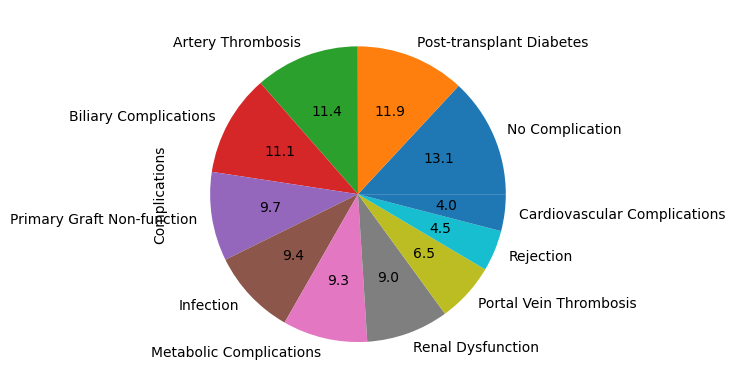

In [45]:
# Pie chart to check the ratio of data

df["Complications"].value_counts().plot.pie(autopct = '%.1f')

## Heatmap

<Axes: >

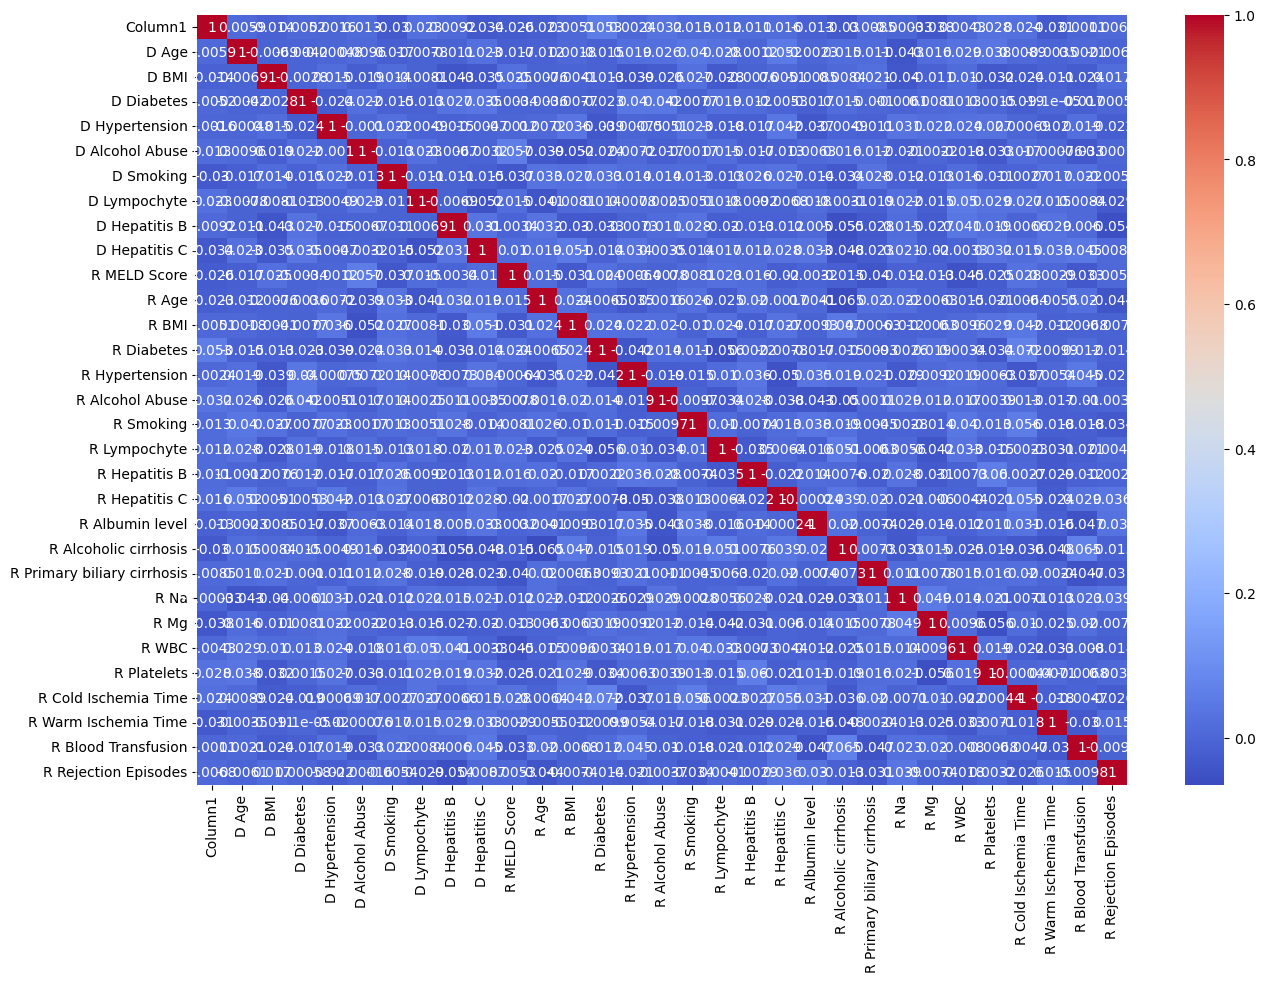

In [7]:
# Creating heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [8]:
# Correlation matrix

df.corr()

Column1     D Age     D BMI  D Diabetes  \
Column1                      1.000000  0.005913 -0.013968    0.005245   
D Age                        0.005913  1.000000 -0.006879   -0.004179   
D BMI                       -0.013968 -0.006879  1.000000   -0.002772   
D Diabetes                   0.005245 -0.004179 -0.002772    1.000000   
D Hypertension               0.001606 -0.000484  0.014549   -0.023773   
D Alcohol Abuse              0.013390  0.009559 -0.019358    0.021873   
D Smoking                   -0.030331 -0.016658  0.013730   -0.014648   
D Lympochyte                 0.023315 -0.007812 -0.008137   -0.012742   
D Hepatitis B                0.009213 -0.010662 -0.042737    0.026749   
D Hepatitis C               -0.034065  0.023205 -0.035461    0.035316   
R MELD Score                -0.026189 -0.017373  0.025381   -0.003404   
R Age                       -0.022810 -0.012357 -0.007625   -0.003620   
R BMI                        0.005075  0.001838 -0.004101   -0.007697   
R Diabetes                   0.052891 -0.014833 -0.012846   -0.023065   
R Hypertension               0.002443  0.019436 -0.038980    0.040038   
R Alcohol Abuse              0.031707  0.025624 -0.026084    0.042225   
R Smoking                    0.013314  0.040096  0.026569   -0.007685   
R Lympochyte                 0.011952  0.028327 -0.027967    0.019184   
R Hepatitis B                0.010779 -0.001197 -0.007630    0.011564   
R Hepatitis C                0.015835  0.051567  0.005142   -0.005332   
R Albumin level             -0.012802 -0.002297 -0.008550   -0.017319   
R Alcoholic cirrhosis       -0.030369  0.015110  0.008429    0.014609   
R Primary biliary cirrhosis  0.008487  0.010900  0.021384   -0.001006   
R Na                        -0.000328 -0.043497 -0.039578   -0.006053   
R Mg                        -0.037575  0.015561 -0.010964    0.008112   
R WBC                        0.004349  0.028601  0.010447    0.013371   
R Platelets                  0.027512  0.037836 -0.031734    0.001518   
R Cold Ischemia Time         0.023926  0.008885 -0.024062   -0.019424   
R Warm Ischemia Time        -0.031219 -0.003508 -0.011486   -0.000091   
R Blood Transfusion          0.001086  0.002050 -0.024499   -0.016577   
R Rejection Episodes         0.006818 -0.006138  0.016525    0.000579   

                             D Hypertension  D Alcohol Abuse  D Smoking  \
Column1                            0.001606         0.013390  -0.030331   
D Age                             -0.000484         0.009559  -0.016658   
D BMI                              0.014549        -0.019358   0.013730   
D Diabetes                        -0.023773         0.021873  -0.014648   
D Hypertension                     1.000000        -0.001028   0.021641   
D Alcohol Abuse                   -0.001028         1.000000  -0.013017   
D Smoking                          0.021641        -0.013017   1.000000   
D Lympochyte                      -0.004905         0.023115  -0.010636   
D Hepatitis B                     -0.014739        -0.006651  -0.010596   
D Hepatitis C                     -0.004688        -0.003227  -0.015062   
R MELD Score                      -0.001248         0.057472  -0.037478   
R Age                              0.007205        -0.039146   0.033186   
R BMI                              0.036387        -0.051990   0.026612   
R Diabetes                        -0.039385        -0.024049   0.033184   
R Hypertension                    -0.000755         0.007152   0.014392   
R Alcohol Abuse                   -0.005136        -0.016800   0.014144   
R Smoking                          0.023463        -0.001741   0.013388   
R Lympochyte                      -0.018390         0.014872  -0.013103   
R Hepatitis B                     -0.017143        -0.016734   0.025779   
R Hepatitis C                      0.042099        -0.012914   0.027368   
R Albumin level                   -0.036858         0.006319  -0.014456   
R Alcoholic cirrhosis             -0.004874

## 5.3 Multivariate Analysis using Pair plot

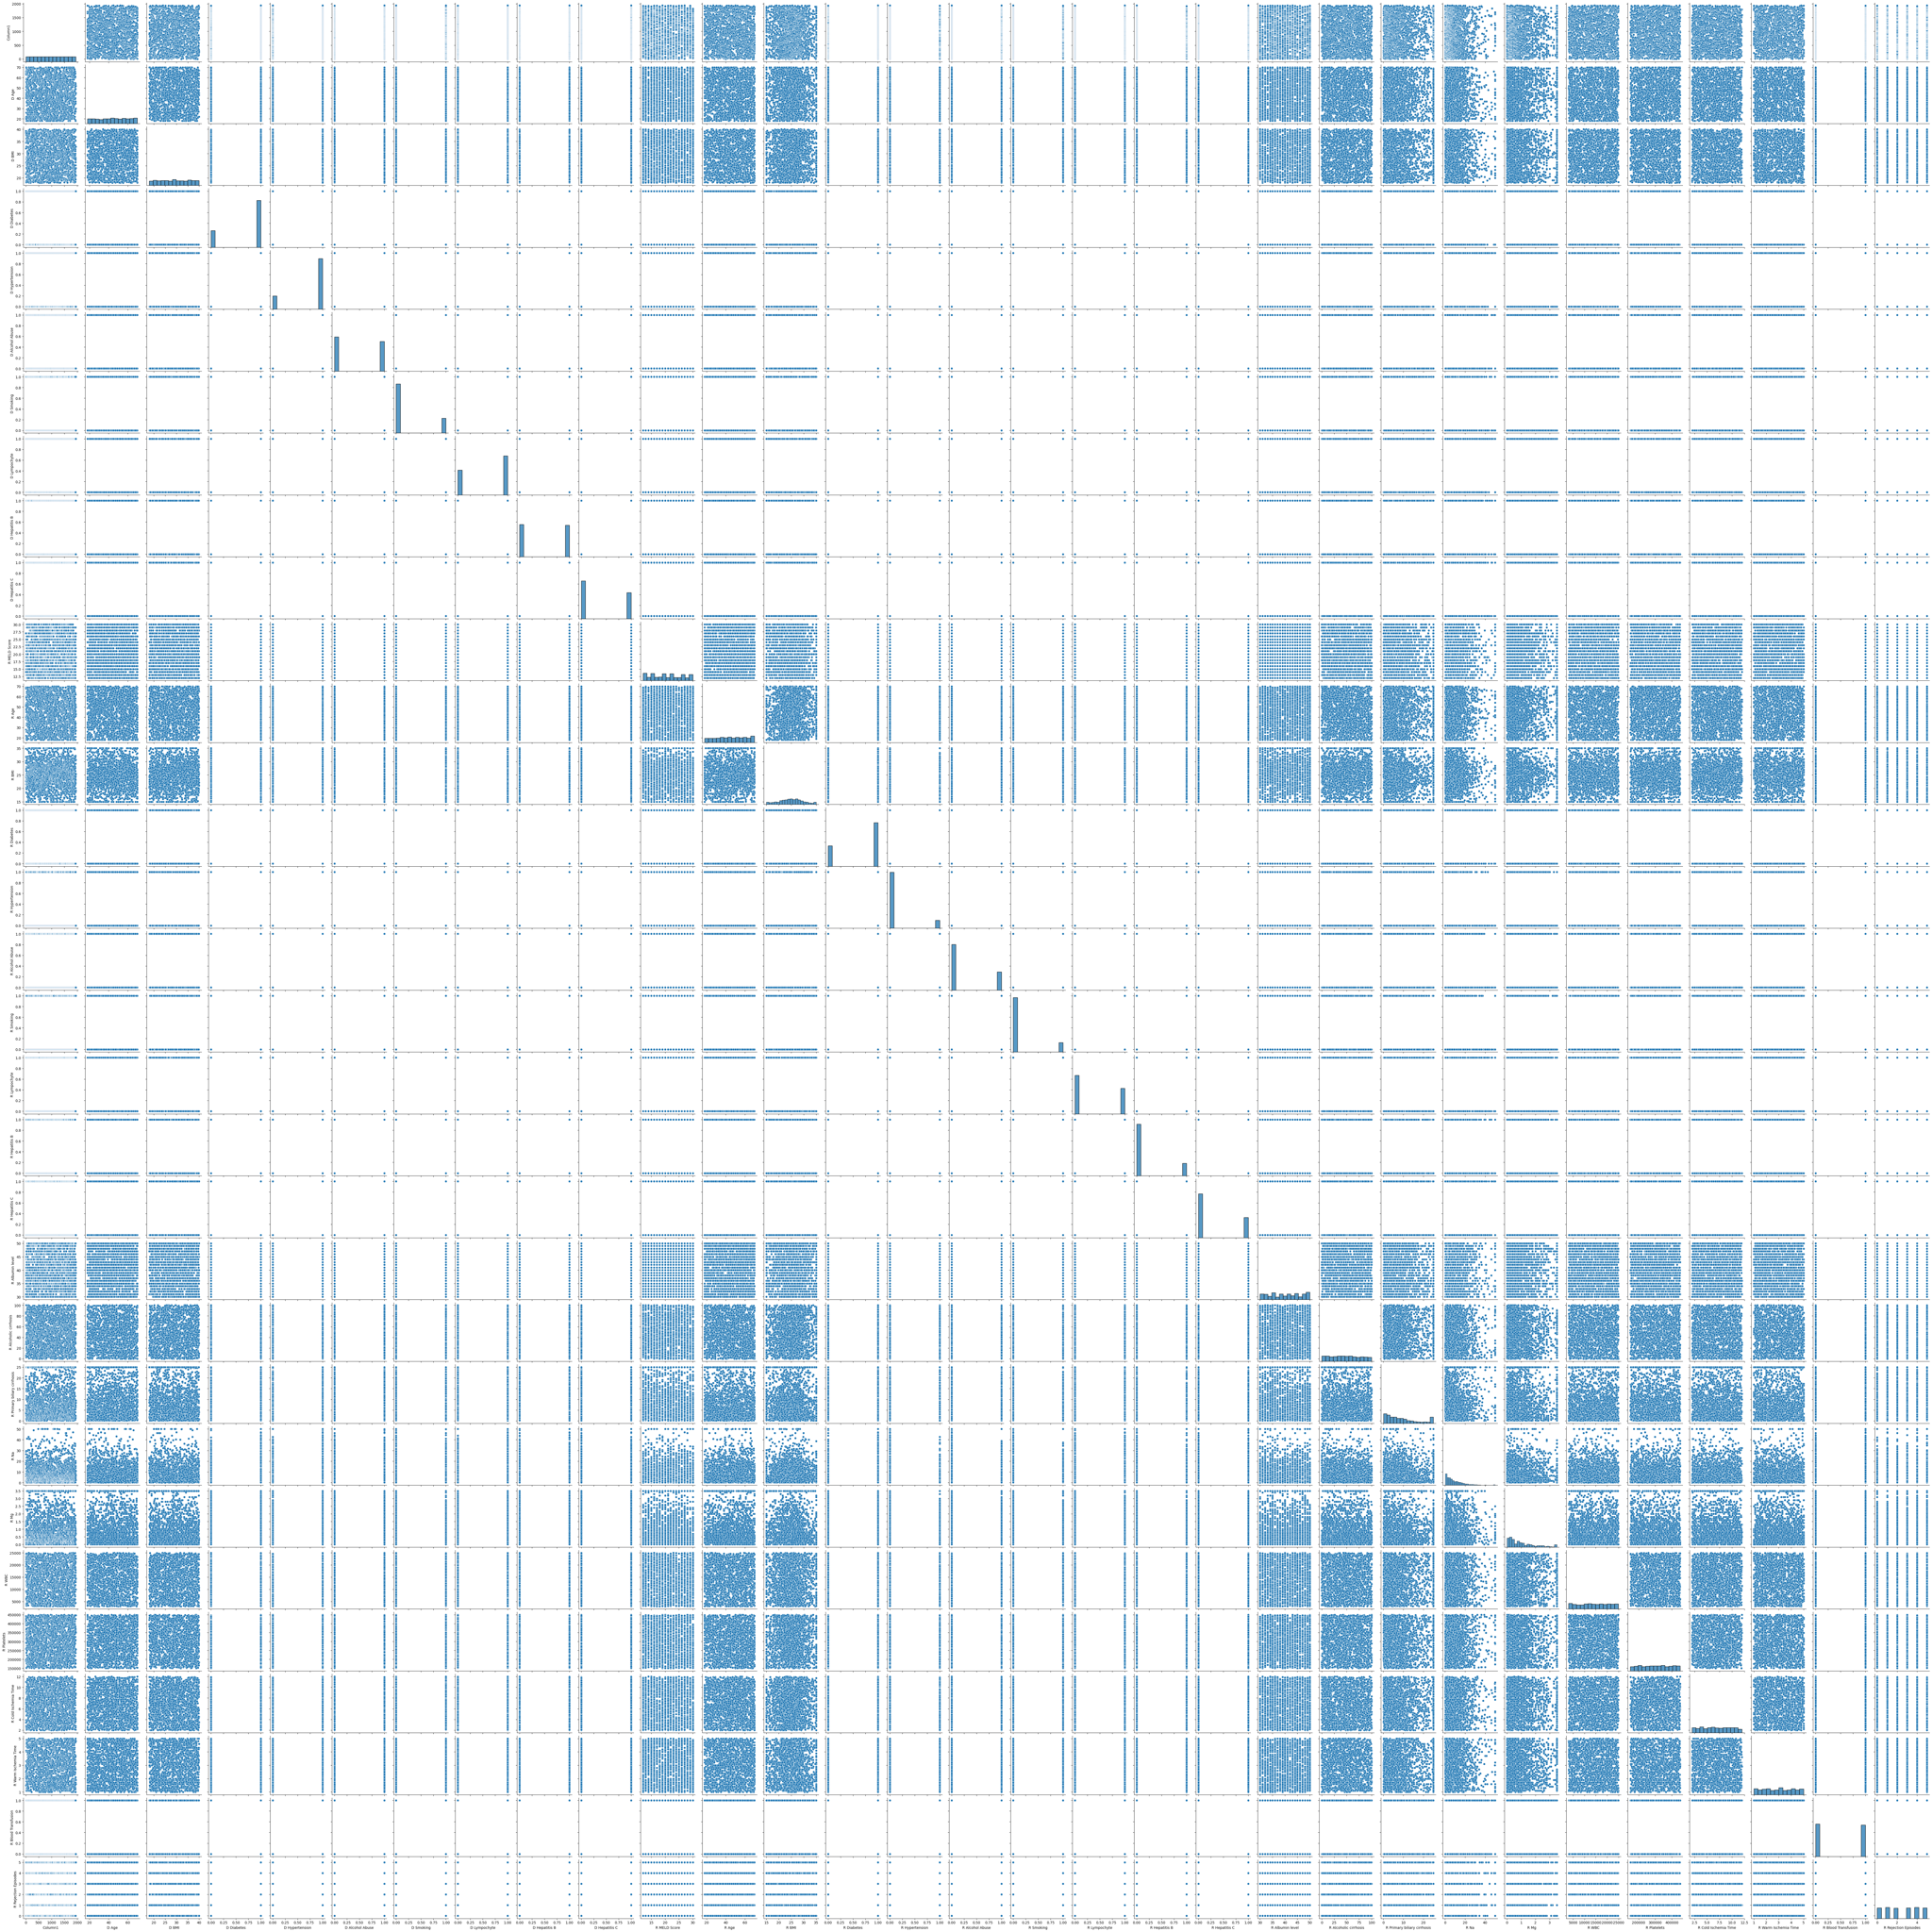

In [46]:
# Pair plot between the variables
sns.pairplot(df)